In [50]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC

from experiments_core import run_tests_splits
from experiments_core import run_one_experiment
from experiments_core import print_baseline_results
from experiments_core import default_tokenize
from experiments_core import tokenize_stems
from experiments_core import tokenize_lemmas
from experiments_core import tokenize_no_urls
from experiments_core import tokenize_norm_letters

from nltk.corpus import stopwords

%matplotlib inline

In [51]:
import importlib
import sys
importlib.reload(sys.modules[run_tests_splits.__module__])
importlib.reload(sys.modules[run_one_experiment.__module__])
importlib.reload(sys.modules[print_baseline_results.__module__])
importlib.reload(sys.modules[default_tokenize.__module__])
importlib.reload(sys.modules[tokenize_stems.__module__])
importlib.reload(sys.modules[tokenize_lemmas.__module__])
importlib.reload(sys.modules[tokenize_no_urls.__module__])
importlib.reload(sys.modules[tokenize_norm_letters.__module__])

<module 'experiments_core' from '/home/ctorres9/EAFIT/trabajogrado/experiments/experiments_core.py'>

In [3]:
file_path = 'data/TweetsPolaridadSEPLN.csv'
original_tweets_df = pd.read_csv(file_path, index_col=None, header=0, sep='\t')
print(original_tweets_df.describe())
print(original_tweets_df.head())

                      tweetid          user               content  \
count                   60798         60798                 60798   
unique                  60798           158                 60405   
top      157749462377312256,0  mariviromero  Buenos días a todos!   
freq                        1          7138                   111   

                       date   lang polarity  topic  
count                 60798  60798    60798  60798  
unique                60510      1        6     10  
top     2012-01-01T00:00:16     es     NONE  otros  
freq                      4  60798    21416  28189  
                 tweetid            user  \
0   142378325086715904,0     jesusmarana   
1   142379080808013824,0       EvaORegan   
2   142379173120442368,0  LosadaPescador   
3   142379815708803072,0    mgilguerrero   
4   142381190123499520,0  pedroj_ramirez   

                                             content                 date  \
0  Portada 'Público', viernes. Fabra al banquil

In [4]:
strong_negative_tweets = original_tweets_df[original_tweets_df.polarity == 'N+'][['content','polarity']]
standar_negative_tweets = original_tweets_df[original_tweets_df.polarity == 'N'][['content','polarity']]

strong_positive_tweets = original_tweets_df[original_tweets_df.polarity == 'P+'][['content','polarity']]
standar_positive_tweets = original_tweets_df[original_tweets_df.polarity == 'P'][['content','polarity']]

negative_tweets = pd.concat([strong_negative_tweets,standar_negative_tweets], ignore_index=True)
positive_tweets = pd.concat([strong_positive_tweets,standar_positive_tweets], ignore_index=True)

negative_tweets.polarity = "negative"
positive_tweets.polarity = "positive"

total_tweets = pd.concat([negative_tweets,positive_tweets], ignore_index=True)
print(total_tweets.describe())
print(total_tweets.head())

                                                  content  polarity
count                                               38077     38077
unique                                              37926         2
top     ¡Noticias descombacantes! está disponible! htt...  positive
freq                                                   63     22233
                                             content  polarity
0  Dado q la deuda privada es superior a la publi...  negative
1  TEPCO inyecta nitrógeno en los reactores de Fu...  negative
2  “@Declaracion: «Cualquier injusticia contra un...  negative
3  ¡Qué estrés!, la presidenta de la diputación d...  negative
4  Hoy entrego mi credencial en el Congreso. Una ...  negative


In [5]:
total_data_content = total_tweets.content
total_data_target = total_tweets.polarity

In [6]:
X_train, X_test, y_train, y_test = train_test_split(total_data_content, 
                                                    total_data_target, 
                                                    test_size=0.3, 
                                                    random_state=80)

In [7]:
print("Positivos entrenamiento:", len(y_train[y_train == 'positive']))
print("Negativos entrenamiento:", len(y_train[y_train == 'negative']))
print("Positivos pruebas:", len(y_test[y_test == 'positive']))
print("Negativos pruebas:", len(y_test[y_test == 'negative']))

Positivos entrenamiento: 15552
Negativos entrenamiento: 11101
Positivos pruebas: 6681
Negativos pruebas: 4743


# Experimentos con el clasificador SVM radial y el metodo de ponderacion TF-IDF (Term Frequency Inverse Document Frecuency)
Los siguientes son los experimentos realizados para el clasificador SVM con kernel radial y con el metodo de ponderación para el modelo de espacio vectorial usando TF-IDF (Term Frequency Inverse Document Frecuency)

# Linea base

In [8]:
tf_idf_vect_baseline = TfidfVectorizer(
                analyzer = 'word',
                tokenizer = default_tokenize,
                lowercase = True)

In [9]:
parameters_svm_rbf = {'kernel': ['rbf'], 'gamma': [1e-3, 1e-4], 'C': [1, 10, 100, 1000]}

### TF-IDF BaseLine

In [10]:
%%time
tf_baseline_results = run_tests_splits(total_data_content, total_data_target, tf_idf_vect_baseline, parameters_svm_rbf, SVC())

random state:  10
train time: 3278.744s
random state:  20
train time: 2280.561s
random state:  30
train time: 2223.078s
random state:  40
train time: 2226.952s
random state:  50
train time: 1959.619s
random state:  60
train time: 2334.163s
random state:  70
train time: 2380.037s
random state:  80
train time: 2104.686s
random state:  90
train time: 1984.408s
random state:  100
train time: 1103.288s
CPU times: user 2h 11min 54s, sys: 1min 44s, total: 2h 13min 39s
Wall time: 6h 9min 16s


In [13]:
tf_idf_baseline_results = tf_baseline_results

Numero de caracteristicas:  (26653, 48317)

Best score selected:  0.9050763516302105
Best Accuracy:  0.9044117647058824
Best Best F1-score:  0.9018659970074773
Best random state:  10
Mejor resultado y parametro encontrados:
Mejor resultado (accuracy cv):  0.9050763516302105
C: 1000
gamma: 0.001
kernel: 'rbf'


Exactitud: 0.9044117647058824
F1_score: 0.9018659970074773
Precision: 0.9011732180262964
Recall: 0.9026159094496302

             precision    recall  f1-score   support

   negative     0.8804    0.8918    0.8861      4761
   positive     0.9220    0.9134    0.9177      6663

avg / total     0.9046    0.9044    0.9045     11424

[[4246  515]
 [ 577 6086]]

Confusion matrix, without normalization
[[4246  515]
 [ 577 6086]]


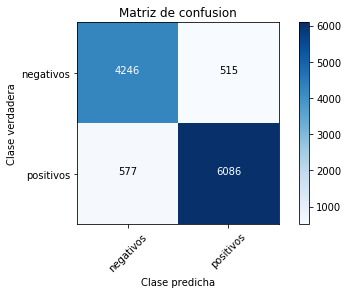

In [24]:
print_baseline_results(tf_idf_baseline_results, parameters_svm_rbf)

In [56]:
all_experiments_results = []

## Prueba de la linea base con los parametros optimos
Esta prueba se hace para validar los resultados obtenidos anteriormente. Si esta bien debe dar lo mismo o un resultado muy similar dependiendo del clasificador.

Numero de caracteristicas:  (26653, 48317)

train time: 657.174s
Mejor resultado y parametro encontrados:
Mejor resultado (accuracy cv):  0.9050763516302105
C: 1000
gamma: 0.001
kernel: 'rbf'

Exactitud: 0.9044117647058824
F1_score: 0.9018659970074773
Precision: 0.9011732180262964
Recall: 0.9026159094496302

             precision    recall  f1-score   support

   negative     0.8804    0.8918    0.8861      4761
   positive     0.9220    0.9134    0.9177      6663

avg / total     0.9046    0.9044    0.9045     11424

[[4246  515]
 [ 577 6086]]

Confusion matrix, without normalization
[[4246  515]
 [ 577 6086]]
CPU times: user 4min 35s, sys: 3.41 s, total: 4min 39s
Wall time: 11min 38s


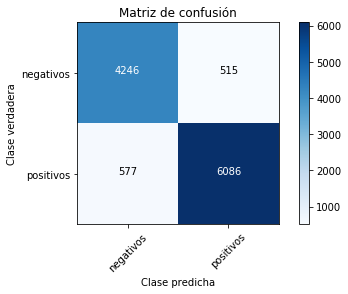

In [57]:
%%time
optimal_parameters = {'kernel': ['rbf'], 'gamma': [0.001], 'C': [1000]}
clf_tf_idf_vect_baseline = run_one_experiment(total_data_content, total_data_target, tf_idf_vect_baseline, optimal_parameters, SVC(), 10)
all_experiments_results.append(clf_tf_idf_vect_baseline)

## Experimento 1: Remocion de stop words

In [58]:
spanish_stopwords = stopwords.words('spanish')

In [59]:
tf_idf_vect_stopwords = TfidfVectorizer(stop_words = spanish_stopwords,
                                        analyzer = 'word',
                                        tokenizer = default_tokenize,
                                        lowercase = True)

Numero de caracteristicas:  (26653, 48064)

train time: 475.365s
Mejor resultado y parametro encontrados:
Mejor resultado (accuracy cv):  0.8916069485611375
C: 1000
gamma: 0.001
kernel: 'rbf'

Exactitud: 0.8915441176470589
F1_score: 0.8882995992162597
Precision: 0.8888515251243815
Recall: 0.8877775498641455

             precision    recall  f1-score   support

   negative     0.8734    0.8652    0.8693      4761
   positive     0.9043    0.9104    0.9073      6663

avg / total     0.8914    0.8915    0.8915     11424

[[4119  642]
 [ 597 6066]]

Confusion matrix, without normalization
[[4119  642]
 [ 597 6066]]
CPU times: user 3min 51s, sys: 2.73 s, total: 3min 53s
Wall time: 8min 26s


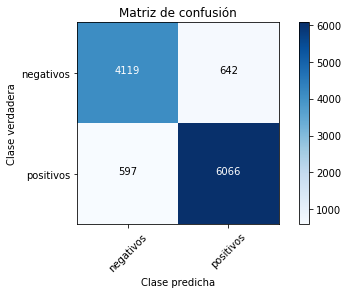

In [60]:
%%time
optimal_parameters = {'kernel': ['rbf'], 'gamma': [0.001], 'C': [1000]}
clf_tf_idf_vect_stopwords = run_one_experiment(total_data_content, total_data_target, tf_idf_vect_stopwords, optimal_parameters, SVC(), 10)
all_experiments_results.append(clf_tf_idf_vect_stopwords)

## Experimento 2: Stemming

In [61]:
#Prueba de los metodos anteriores
print(tokenize_stems(
    "holaaaa como estas estaaaas creerías en mi si lloviera mañana, tu crees en mi cartas ¡¡ ¿¿. a e i o u aeiou"))

['holaaa', 'com', 'estas', 'estaa', 'cre', 'en', 'mi', 'si', 'llov', 'mañan', 'tu', 'cre', 'en', 'mi', 'cart', 'aeiou']


In [62]:
tf_idf_vect_stemming = TfidfVectorizer(
                analyzer = 'word',
                tokenizer = tokenize_stems,
                lowercase = True)

Numero de caracteristicas:  (26653, 32872)

train time: 385.469s
Mejor resultado y parametro encontrados:
Mejor resultado (accuracy cv):  0.9061644092597456
C: 1000
gamma: 0.001
kernel: 'rbf'

Exactitud: 0.9041491596638656
F1_score: 0.901483995524076
Precision: 0.9012146411733892
Recall: 0.9017612333286142

             precision    recall  f1-score   support

   negative     0.8832    0.8874    0.8853      4761
   positive     0.9193    0.9161    0.9177      6663

avg / total     0.9042    0.9041    0.9042     11424

[[4225  536]
 [ 559 6104]]

Confusion matrix, without normalization
[[4225  536]
 [ 559 6104]]
CPU times: user 3min 24s, sys: 2.59 s, total: 3min 26s
Wall time: 7min 17s


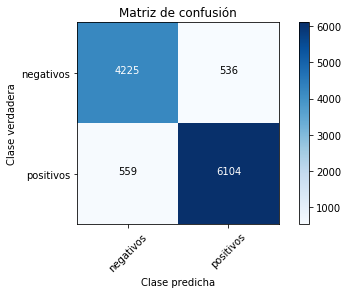

In [63]:
%%time
optimal_parameters = {'kernel': ['rbf'], 'gamma': [0.001], 'C': [1000]}
clf_tf_idf_vect_stemming = run_one_experiment(total_data_content, total_data_target, tf_idf_vect_stemming, optimal_parameters, SVC(), 10)
all_experiments_results.append(clf_tf_idf_vect_stemming)

## Experimento 3: Lematizacion

In [64]:
# Prueba del tokenizer
print(tokenize_lemmas(
    "holaaaa como estas estaaaas creerías en mi si lloviera mañana, tu crees en mi cartas ¡¡ ¿¿. a e i o u aeiou"))

['holaaaa', 'comer', 'este', 'estaaaas', 'creer', 'en', 'mi', 'si', 'llover', 'mañana', 'tu', 'creer', 'en', 'mi', 'carta', 'aeiou']


In [65]:
tf_idf_vect_lemmatize = TfidfVectorizer(
                analyzer = 'word',
                tokenizer = tokenize_lemmas,
                lowercase = True)

Numero de caracteristicas:  (26653, 36738)

train time: 491.368s
Mejor resultado y parametro encontrados:
Mejor resultado (accuracy cv):  0.909316024462537
C: 1000
gamma: 0.001
kernel: 'rbf'

Exactitud: 0.9057247899159664
F1_score: 0.9031434189671347
Precision: 0.9027156211455951
Recall: 0.9035916351346738

             precision    recall  f1-score   support

   negative     0.8839    0.8908    0.8873      4761
   positive     0.9215    0.9164    0.9190      6663

avg / total     0.9058    0.9057    0.9058     11424

[[4241  520]
 [ 557 6106]]

Confusion matrix, without normalization
[[4241  520]
 [ 557 6106]]
CPU times: user 3min 55s, sys: 2.52 s, total: 3min 58s
Wall time: 8min 49s


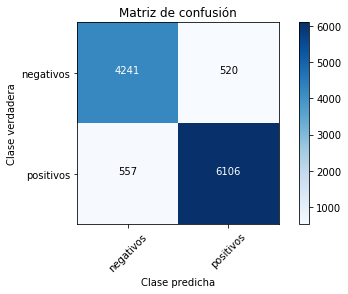

In [66]:
%%time
optimal_parameters = {'kernel': ['rbf'], 'gamma': [0.001], 'C': [1000]}
clf_tf_idf_vect_lemmatize = run_one_experiment(total_data_content, total_data_target, tf_idf_vect_lemmatize, optimal_parameters, SVC(), 10)
all_experiments_results.append(clf_tf_idf_vect_lemmatize)

## Experimento 4: Remocion de URLs

In [67]:
# Prueba de la tokenizacion sin urls
print(tokenize_no_urls(
    "holaaaa cómo http://estas creerías https://stackoverflow.com/questions/11331982/how-to-remove-any-url-within-a-string-in-python mi si lloviera \t  mañana, tu crees en mi cartas ¡¡ ¿¿. aeiou"))

['holaaaa', 'cómo', 'creerías', 'mi', 'si', 'lloviera', 'mañana', 'tu', 'crees', 'en', 'mi', 'cartas', 'aeiou']


In [68]:
tf_idf_vect_no_urls = TfidfVectorizer(
                analyzer = 'word',
                tokenizer = tokenize_no_urls,
                lowercase = True)

Numero de caracteristicas:  (26653, 40316)

train time: 497.652s
Mejor resultado y parametro encontrados:
Mejor resultado (accuracy cv):  0.903913255543466
C: 1000
gamma: 0.001
kernel: 'rbf'

Exactitud: 0.9027485994397759
F1_score: 0.9001324544477599
Precision: 0.899536180089967
Recall: 0.9007704237330532

             precision    recall  f1-score   support

   negative     0.8791    0.8889    0.8840      4761
   positive     0.9200    0.9127    0.9163      6663

avg / total     0.9029    0.9027    0.9028     11424

[[4232  529]
 [ 582 6081]]

Confusion matrix, without normalization
[[4232  529]
 [ 582 6081]]
CPU times: user 4min 5s, sys: 3.11 s, total: 4min 9s
Wall time: 8min 56s


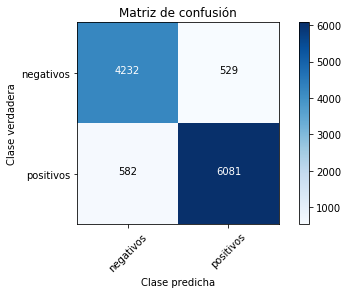

In [69]:
%%time
optimal_parameters = {'kernel': ['rbf'], 'gamma': [0.001], 'C': [1000]}
clf_tf_idf_vect_no_urls = run_one_experiment(total_data_content, total_data_target, tf_idf_vect_no_urls, optimal_parameters, SVC(), 10)
all_experiments_results.append(clf_tf_idf_vect_no_urls)

## Experimento 5: Remocion de letras repetidas

In [70]:
print(tokenize_norm_letters(
    "holaaaa cómo http://estas estaaaas creerías mi si lloviera mañana, tu crees en mi cartas ¡¡ ¿¿. a e i o u aeiou"))

['hola', 'cómo', 'htp', 'estas', 'estas', 'creerías', 'mi', 'si', 'lloviera', 'mañana', 'tu', 'crees', 'en', 'mi', 'cartas', 'aeiou']


In [71]:
tf_idf_vect_norm_letters = TfidfVectorizer(
                analyzer = 'word',
                tokenizer = tokenize_norm_letters,
                lowercase = True)

Numero de caracteristicas:  (26653, 47534)

train time: 600.871s
Mejor resultado y parametro encontrados:
Mejor resultado (accuracy cv):  0.9054890631448618
C: 1000
gamma: 0.001
kernel: 'rbf'

Exactitud: 0.9046743697478992
F1_score: 0.9020871879795176
Precision: 0.901573339309544
Recall: 0.9026311825000914

             precision    recall  f1-score   support

   negative     0.8820    0.8904    0.8862      4761
   positive     0.9211    0.9149    0.9180      6663

avg / total     0.9048    0.9047    0.9047     11424

[[4239  522]
 [ 567 6096]]

Confusion matrix, without normalization
[[4239  522]
 [ 567 6096]]
CPU times: user 4min 34s, sys: 3.36 s, total: 4min 37s
Wall time: 10min 47s


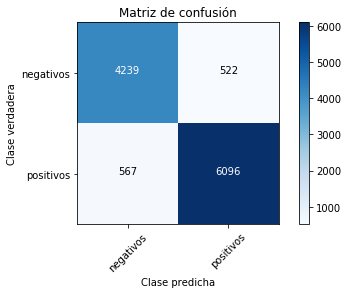

In [72]:
%%time
optimal_parameters = {'kernel': ['rbf'], 'gamma': [0.001], 'C': [1000]}
clf_tf_idf_vect_norm_letters = run_one_experiment(total_data_content, total_data_target, tf_idf_vect_norm_letters, optimal_parameters, SVC(), 10)
all_experiments_results.append(clf_tf_idf_vect_norm_letters)

## Experimento 6: Remocion de terminos poco comunes (pruning < 10)

In [73]:
tf_idf_vect_pruning10 = TfidfVectorizer(
                analyzer = 'word',
                tokenizer = default_tokenize,
                lowercase = True,
                min_df=10)

Numero de caracteristicas:  (26653, 4350)

train time: 204.833s
Mejor resultado y parametro encontrados:
Mejor resultado (accuracy cv):  0.8948336022211383
C: 1000
gamma: 0.001
kernel: 'rbf'

Exactitud: 0.8922443977591037
F1_score: 0.8892087445791305
Precision: 0.8890820702443951
Recall: 0.889337197840665

             precision    recall  f1-score   support

   negative     0.8699    0.8719    0.8709      4761
   positive     0.9083    0.9068    0.9075      6663

avg / total     0.8923    0.8922    0.8923     11424

[[4151  610]
 [ 621 6042]]

Confusion matrix, without normalization
[[4151  610]
 [ 621 6042]]
CPU times: user 1min 44s, sys: 2.27 s, total: 1min 47s
Wall time: 3min 49s


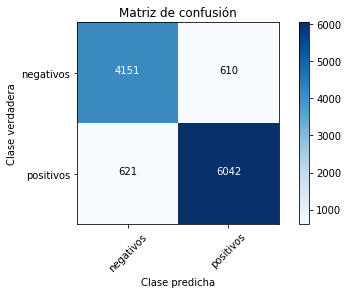

In [74]:
%%time
optimal_parameters = {'kernel': ['rbf'], 'gamma': [0.001], 'C': [1000]}
clf_tf_idf_vect_pruning10 = run_one_experiment(total_data_content, total_data_target, tf_idf_vect_pruning10, optimal_parameters, SVC(), 10)
all_experiments_results.append(clf_tf_idf_vect_pruning10)

## Experimento 7: Remocion de terminos poco comunes (pruning < 5)

In [75]:
tf_idf_vect_pruning5 = TfidfVectorizer(
                analyzer = 'word',
                tokenizer = default_tokenize,
                lowercase = True,
                min_df=5)

Numero de caracteristicas:  (26653, 7786)

train time: 262.298s
Mejor resultado y parametro encontrados:
Mejor resultado (accuracy cv):  0.8996360634825348
C: 1000
gamma: 0.001
kernel: 'rbf'

Exactitud: 0.8996848739495799
F1_score: 0.8969652858927348
Precision: 0.8964474538557521
Recall: 0.8975144268856378

             precision    recall  f1-score   support

   negative     0.8760    0.8845    0.8802      4761
   positive     0.9169    0.9106    0.9137      6663

avg / total     0.8998    0.8997    0.8998     11424

[[4211  550]
 [ 596 6067]]

Confusion matrix, without normalization
[[4211  550]
 [ 596 6067]]
CPU times: user 2min 13s, sys: 2.33 s, total: 2min 16s
Wall time: 4min 48s


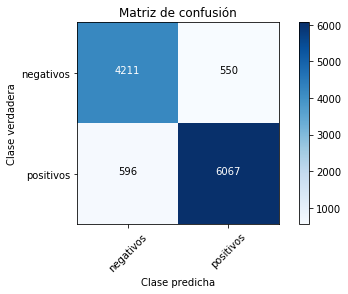

In [76]:
%%time
optimal_parameters = {'kernel': ['rbf'], 'gamma': [0.001], 'C': [1000]}
clf_tf_idf_vect_pruning5 = run_one_experiment(total_data_content, total_data_target, tf_idf_vect_pruning5, optimal_parameters, SVC(), 10)
all_experiments_results.append(clf_tf_idf_vect_pruning5)

In [80]:
len(all_experiments_results)

8

In [78]:
import xlsxwriter

In [79]:
# Create a workbook and add a worksheet.
# workbook = xlsxwriter.Workbook('result_es_twitter_sa_svm_rbf_tfidf.xlsx')
# worksheet = workbook.add_worksheet()
# row = 0
# col = 0
# for exp in all_experiments_results:
#     worksheet.write(row, col, exp[0])
#     row += 1
#     worksheet.write(row, col, exp[1])
#     row += 1
#     worksheet.write(row, col, exp[2])
#     row += 1
#     worksheet.write(row, col, exp[3])
#     row += 1
#     worksheet.write(row, col, exp[4])
#     row += 1
#     worksheet.write(row, col, exp[5])
#     row += 1
#     worksheet.write(row, col, exp[6])
#     row += 1
#     worksheet.write(row, col, exp[7])
#     row += 1
#     worksheet.write(row, col, exp[8])
#     row += 1
#     row = 0
#     col += 1
# workbook.close()